### Run this cell first which will load in required functions from helper.py

In [13]:
%matplotlib notebook
%run helper_fx.py

Importing required functions...
Initializing session...


### Change this to the filename you want to analyse

In [59]:
file = "C:\\Users\\jmc010\\Dropbox\\Shared and resource folders\\Celia\\Celia-191007-151541"

In [45]:
# This sets the stream names that you want from the file and changes from Box 1 and Box 2
SigBlue = 'D1B2'
SigUV = 'D2B2'

### This code reads in data from the file above and should (probably) not be modified

In [46]:
tmp = tdt.read_block(file, evtype=['streams'], store=[SigBlue])
x.data = getattr(tmp.streams, SigBlue)['data']
x.fs = getattr(tmp.streams, SigBlue)['fs']

tmp = tdt.read_block(file, evtype=['streams'], store=[SigUV])
x.dataUV = getattr(tmp.streams, SigUV)['data']

x.ttls = tdt.read_block(file, evtype=['epocs']).epocs

Found Synapse note file: C:\Users\jmc010\Dropbox\Shared and resource folders\Celia\Celia-191007-151541\Notes.txt
read from t=0s to t=2194.56s
Found Synapse note file: C:\Users\jmc010\Dropbox\Shared and resource folders\Celia\Celia-191007-151541\Notes.txt
read from t=0s to t=2194.56s
Found Synapse note file: C:\Users\jmc010\Dropbox\Shared and resource folders\Celia\Celia-191007-151541\Notes.txt
read from t=0s to t=2194.56s


In [48]:
x.set_tick()
x.time2samples()
x.data_filt = correctforbaseline(x.data, x.dataUV)

Ticks set correctly.
t2sMap made correctly.


### Initial plot of the signals to show they've loaded correctly - raw sigs on left, processed on right

<IPython.core.display.Javascript object>


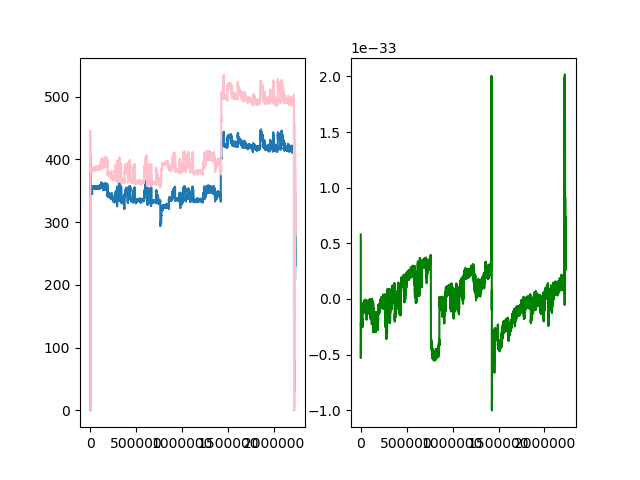

In [60]:
f, ax = plt.subplots(ncols=2)
ax[0].plot(x.data)
ax[0].plot(x.dataUV, 'pink');

ax[1].plot(x.data_filt, color='green')

In [61]:
# This gets the events into a variable

x.events = x.ttls.Ep1_.notes.ts
print(f"{len(events)} events were found.")

28 events were found.


In [52]:
# This cell sets up some variables needed for the snipper program so that it can remove noisy trials objectively

bins = 100

x.randomevents = makerandomevents(120, max(x.tick)-120)
x.bgTrials, pps = snipper(x.data_filt, x.randomevents,
                                t2sMap = x.t2sMap, fs=x.fs, bins=bins)
x.bgMAD = findnoise(x.data_filt, x.randomevents, t2sMap=x.t2sMap, fs=x.fs,
                  bins=bins, method='sum')

In [62]:
# This cell makes snips, various parameters can bne changed but ensure that if you change trial length, bins, baseline etc that all match up

snips = mastersnipper(x.data, x.dataUV, x.data_filt,
                      x.t2sMap, x.fs, x.bgMAD,
                      x.events,
                      bins=bins,
                      baselinebins=50,
                      preTrial=5,
                      trialLength=10,
                      threshold=8)

28 events to analyze.
0 noise trials removed
No latency events found


In [58]:
# This cell shows the various dictionary keys that exist in snips - you can look at blue, uv, filtered signal etc
# My preferred signal is the 'filt_z', the z socre of the filtered signal

print(snips.keys())

28 events to analyze.
0 noise trials removed
No latency events found
dict_keys(['blue', 'uv', 'filt', 'filt_z', 'filt_z_adjBL', 'filt_avg', 'filt_avg_z', 'noise', 'peak', 'latency'])


<IPython.core.display.Javascript object>


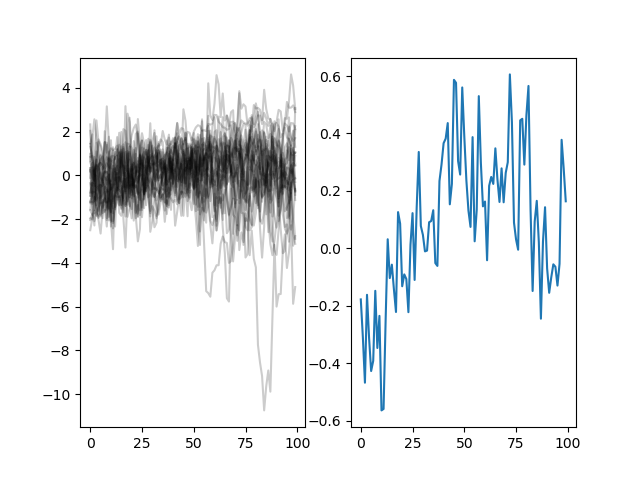

In [67]:
# Here's a simple plot of the mean of the snips
f, ax = plt.subplots(ncols=2)

for snip in snips['filt_z']:
    ax[0].plot(snip, color='k', alpha=0.2)
    
ax[1].plot(np.mean(snips['filt_z'], axis=0))

